<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/tensorflow-addons/MNIST_with_TensorFlow_addons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.1.0
!pip install  tensorflow-addons==0.9.1
#!pip install -q efficientnet --upgrade
#!pip install tensorflow-addons
#!pip install -q "tqdm>=4.36.1"

     |████████████████████████████████| 421.8MB 30kB/s 
     |████████████████████████████████| 450kB 49.9MB/s 
     |████████████████████████████████| 3.9MB 50.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=162513a7024d3204ccc2def149b30a9a97dc1cd973b5b89d02fe3479536a2978
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc

In [0]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.reshape(-1,784)/255.0, X_test.reshape(-1,784)/255.0

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
Learning rate schedule: 0.003 to 0.005 to 0.000521


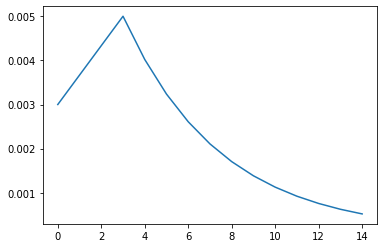

In [35]:
%pylab
%matplotlib inline
LR_START = 0.003
LR_MAX = 0.005 
LR_MIN = 0.0001
LR_RAMPUP_EPOCHS = 3
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .8

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr
EPOCHS=15
rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [36]:
inputs = tf.keras.layers.Input(shape=(784,))
x = tfa.layers.WeightNormalization(tf.keras.layers.Dense(512, activation=tfa.activations.mish))(inputs)
outputs = tfa.layers.WeightNormalization(tf.keras.layers.Dense(10, activation='softmax'))(x)

model = tf.keras.models.Model(inputs, outputs)
model.compile(optimizer = tfa.optimizers.Lookahead(tfa.optimizers.RectifiedAdam(lr=1e-3,total_steps=10000,warmup_proportion=0.1,min_lr=1e-5,), sync_period=6, slow_step_size=0.5),loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=128, callbacks=[tfa.callbacks.tqdm_progress_bar.TQDMProgressBar(), tf.keras.callbacks.LearningRateScheduler(lrfn, verbose = True)],verbose=0)

Epoch 1/15



Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.

Epoch 2/15



Epoch 00002: LearningRateScheduler reducing learning rate to 0.0036666666666666666.

Epoch 3/15



Epoch 00003: LearningRateScheduler reducing learning rate to 0.004333333333333333.

Epoch 4/15



Epoch 00004: LearningRateScheduler reducing learning rate to 0.005.

Epoch 5/15



Epoch 00005: LearningRateScheduler reducing learning rate to 0.00402.

Epoch 6/15



Epoch 00006: LearningRateScheduler reducing learning rate to 0.003236.

Epoch 7/15



Epoch 00007: LearningRateScheduler reducing learning rate to 0.0026088000000000005.

Epoch 8/15



Epoch 00008: LearningRateScheduler reducing learning rate to 0.00210704.

Epoch 9/15



Epoch 00009: LearningRateScheduler reducing learning rate to 0.0017056320000000003.

Epoch 10/15



Epoch 00010: LearningRateScheduler reducing learning rate to 0.0013845056000000005.

Epoch 11/15



Epoch 00011: LearningRateScheduler reducing learning rate to 0.0011276044800000004.

Epoch 12/15



Epoch 00012: LearningRateScheduler reducing learning rate to 0.0009220835840000005.

Epoch 13/15



Epoch 00013: LearningRateScheduler reducing learning rate to 0.0007576668672000003.

Epoch 14/15



Epoch 00014: LearningRateScheduler reducing learning rate to 0.0006261334937600003.

Epoch 15/15



Epoch 00015: LearningRateScheduler reducing learning rate to 0.0005209067950080002.


